In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
cobra_09_path = "data/COBRA-2009-2019.csv"
cobra_20_path = "data/COBRA-2020.csv"
cobra_21_path = "data/COBRA-2021.csv"
county_cases_path = "data/county_cases.csv"

# Read the mouse data and the study results
cobra_09 = pd.read_csv(cobra_09_path)
cobra_20 = pd.read_csv(cobra_20_path)
cobra_21 = pd.read_csv(cobra_21_path)
county_cases = pd.read_csv(county_cases_path)


# Combine the data into a single dataset
#study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
#study_data_complete


C:\Users\User\Documents\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [122]:
cobra_09.columns = ['offense_id','rpt_date','occur_date','occur_time','poss_date','poss_time','beat','apt_office_prefix', 'apt_office_num', 'location', 'shift_occurence','location_type','UC2_Literal','UC2#','ibr_code','neighborhood','npu','lat','long']
cobra_09 = cobra_09.drop(columns = ['apt_office_prefix','apt_office_num','shift_occurence','location_type','UC2#', 'poss_date'])
cobra_09

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,2009-01-01,2009-01-01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,2019-12-31,2019-12-31,2030,2034.0,105.0,1385 SHARON ST NW,AGG ASSAULT,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,2019-12-31,2019-12-31,432,432.0,206.0,262 PHARR RD NE,AGG ASSAULT,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,2019-12-31,2019-12-31,920,940.0,404.0,689 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73636,-84.43680
342912,193651760,2019-12-31,2019-12-31,1853,1900.0,404.0,763 CASCADE AVE SW,AGG ASSAULT,1314,Westview,T,33.73483,-84.43750


In [123]:
cobra_09['rpt_date']= pd.to_datetime(cobra_09['rpt_date'])
cobra_09['occur_date']= pd.to_datetime(cobra_09['occur_date'])
cobra_09['rpt_date'] = cobra_09['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_09['occur_date'] = cobra_09['occur_date'].dt.strftime("%m/%d/%Y")
cobra_09.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [124]:
cobra_09.insert(3,'occur_year',cobra_09['occur_date'].str[-4:])
cobra_09_delete = cobra_09.loc[cobra_09['occur_year'].str[:2] != '20']
cobra_09_delete_list = cobra_09_delete['offense_id'].to_list()
cobra_09 = cobra_09[~cobra_09['offense_id'].isin(cobra_09_delete_list)]
cobra_09.head(3)

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282


In [125]:
cobra_20 = cobra_20.drop(columns = ['apt_office_prefix','apt_office_num','MinOfucr','dispo_code','Shift','loc_type', 'poss_date'])
cobra_20_reorder = ['offense_id','rpt_date','occur_date','occur_time','poss_time','beat','location','ibr_code','UC2_Literal','neighborhood','npu','lat','long']
cobra_20_reordered = cobra_20.reindex(columns = cobra_20_reorder)
cobra_20 = cobra_20_reordered.copy()

In [126]:
cobra_20.insert(3,'occur_year',cobra_20['occur_date'].str[-4:])
cobra_20_delete = cobra_20.loc[cobra_20['occur_year'].str[:2] != '20']
cobra_20_delete_list = cobra_20_delete['offense_id'].to_list()
cobra_20 = cobra_20[~cobra_20['offense_id'].isin(cobra_20_delete_list)]
cobra_20.head(3)

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736


In [127]:
cobra_20['rpt_date']= pd.to_datetime(cobra_20['rpt_date'])
cobra_20['occur_date']= pd.to_datetime(cobra_20['occur_date'])
cobra_20['rpt_date'] = cobra_20['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_20['occur_date'] = cobra_20['occur_date'].dt.strftime("%m/%d/%Y")
cobra_20.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203341346,12/31/2020,11/29/2020,2020,19:21,23:50,405,3050 M.L.K. JR DR SW,13A,AGG ASSAULT,Harland Terrace,I,33.751060,-84.486163
1,203631200,12/31/2020,12/28/2020,2020,17:21,17:45,302,1186 IRA ST SW,23H,LARCENY-NON VEHICLE,Pittsburgh,V,33.722696,-84.399763
2,203631285,12/31/2020,12/24/2020,2020,14:00,18:26,603,501 BOULEVARD PL NE,23H,LARCENY-NON VEHICLE,Old Fourth Ward,M,33.769680,-84.370736
3,203651634,12/31/2020,12/30/2020,2020,20:15,22:25,211,3101 PIEDMONT RD NE,23F,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840653,-84.369361
4,203660108,12/31/2020,12/31/2020,2020,1:15,1:15,306,1974 SYLVAN RD SW,13A,AGG ASSAULT,Sylvan Hills,X,33.700432,-84.418128


In [128]:
cobra_21 = cobra_21.drop(columns = ['occur_day','occur_day_num','occur_day_num','zone', 'poss_date'])
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [129]:
cobra_21.insert(3,'occur_year',cobra_21['occur_date'].str[-4:])
cobra_21_delete = cobra_21.loc[cobra_21['occur_year'].str[:2] != '20']
cobra_21_delete_list = cobra_21_delete['offense_id'].to_list()
cobra_21 = cobra_21[~cobra_21['offense_id'].isin(cobra_21_delete_list)]
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,6/28/2021,6/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,1/5/2021,1/4/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,9/18/2021,9/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [130]:
cobra_21['rpt_date']= pd.to_datetime(cobra_21['rpt_date'])
cobra_21['occur_date']= pd.to_datetime(cobra_21['occur_date'])
cobra_21['rpt_date'] = cobra_21['rpt_date'].dt.strftime("%m/%d/%Y")
cobra_21['occur_date'] = cobra_21['occur_date'].dt.strftime("%m/%d/%Y")
cobra_21.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,05/20/2021,05/19/2021,2021,15:20,15:25,103,"1720 MARIETTA BLVD NW\r\nATLANTA, GA 30318\r\n...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,08/06/2021,08/06/2021,2021,22:23,22:24,508,"300 PEACHTREE ST NE\r\nATLANTA, GA 30308\r\nUN...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21791668,06/28/2021,06/27/2021,2021,21:17,20:00,102,"870 MAYSON TURNER RD NW\r\nATLANTA, GA 30314\r...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
3,200041082,01/05/2021,01/04/2021,2021,16:00,17:00,605,"275 MEMORIAL DR SE\r\nATLANTA, GEORGIA 30312\r...",23C,LARCENY-NON VEHICLE,Grant Park,W,33.746503,-84.378535
4,202611428,09/18/2021,09/18/2021,2021,18:04,18:15,112,"2750 DONALD LEE HOLLOWELL PKWY NW\r\nATLANTA, ...",23C,LARCENY-NON VEHICLE,Collier Heights,I,33.777383,-84.477433


In [131]:
concat_list = [cobra_09, cobra_20, cobra_21]  # List of your dataframes
crime_df_complete = pd.concat(concat_list)
crime_df_complete.head()

,offense_id,rpt_date,occur_date,occur_year,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [132]:
crime_df_complete.insert(4,'occur_month',crime_df_complete['occur_date'].str[:2])
crime_df_complete.insert(5,'occur_day',crime_df_complete['occur_date'].str[3:5])

In [133]:
crime_df_complete.head()

,offense_id,rpt_date,occur_date,occur_year,occur_month,occur_day,occur_time,poss_time,beat,location,UC2_Literal,ibr_code,neighborhood,npu,lat,long
0,90010930,01/01/2009,01/01/2009,2009,01,01,1145,1148.0,411.0,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,01/01/2009,01/01/2009,2009,01,01,1330,1330.0,511.0,12 BROAD ST SW,LARCENY-NON VEHICLE,2303,Downtown,M,33.75320,-84.39201
2,90011208,01/01/2009,01/01/2009,2009,01,01,1500,1520.0,407.0,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,2303,Adamsville,H,33.75735,-84.50282
3,90011218,01/01/2009,01/01/2009,2009,01,01,1450,1510.0,210.0,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,2303,Lenox,B,33.84676,-84.36212
4,90011289,01/01/2009,01/01/2009,2009,01,01,1600,1700.0,411.0,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,2303,Greenbriar,R,33.68677,-84.49773


In [134]:
county_cases.columns = ['County Name','Cases','County ID','State FIPS Code','County FIPS Code','Population','Hospitalization','Deaths', 'Case Rate', 'Death Rate', '14 Day Case Rate','14 Day Cases','Antigen Cases','Probable Deaths']
county_cases.head()

,County Name,Cases,County ID,State FIPS Code,County FIPS Code,Population,Hospitalization,Deaths,Case Rate,Death Rate,14 Day Case Rate,14 Day Cases,Antigen Cases,Probable Deaths
0,Appling,2761,US-13001,13,1,18561,234,94,14875.28,506.44,269.38,50,720,9
1,Atkinson,1171,US-13003,13,3,8330,172,29,14057.62,348.14,252.10,21,395,5
2,Bacon,1856,US-13005,13,5,11404,147,47,16274.99,412.14,306.91,35,646,11
3,Baker,241,US-13007,13,7,3116,43,13,7734.27,417.20,64.18,2,138,1
4,Baldwin,5232,US-13009,13,9,44428,381,162,11776.36,364.63,126.05,56,1399,22


In [135]:
cobra_09_new=pd.pivot_table(cobra_09, columns = "occur_year", index = "UC2_Literal", aggfunc = "count")
cobra_09_new=cobra_09_new.reset_index()
cobra_09_new


UC2_Literal beat                                       \
occur_year                       2000 2001 2003 2004 2005 2006 2007   2008   
0                    AGG ASSAULT  NaN  NaN  NaN  1.0  NaN  NaN  2.0    4.0   
1                     AUTO THEFT  NaN  1.0  NaN  NaN  NaN  NaN  3.0   41.0   
2                BURGLARY-NONRES  NaN  NaN  NaN  NaN  1.0  1.0  2.0   13.0   
3             BURGLARY-RESIDENCE  2.0  1.0  NaN  NaN  2.0  2.0  3.0   91.0   
4                       HOMICIDE  NaN  NaN  NaN  NaN  NaN  1.0  NaN    1.0   
5           LARCENY-FROM VEHICLE  NaN  NaN  NaN  NaN  1.0  1.0  2.0   67.0   
6            LARCENY-NON VEHICLE  NaN  3.0  1.0  1.0  NaN  2.0  4.0  116.0   
7                   MANSLAUGHTER  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
8             ROBBERY-COMMERCIAL  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
9             ROBBERY-PEDESTRIAN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    8.0   
10             ROBBERY-RESIDENCE  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   

                     ... rpt_date                                          \
occur_year     2009  ...     2010    2011    2012    2013    2014    2015   
0            2613.0  ...   2612.0  2536.0  2521.0  2275.0  2238.0  2156.0   
1            5625.0  ...   4996.0  5205.0  5098.0  4483.0  4142.0  4236.0   
2            1682.0  ...   1272.0   996.0   825.0   971.0  1030.0   863.0   
3            7393.0  ...   6713.0  6408.0  5326.0  4976.0  4436.0  3921.0   
4              77.0  ...     89.0    84.0    83.0    81.0    87.0    87.0   
5           10966.0  ...   9176.0  8589.0  8825.0  9343.0  9459.0  9593.0   
6            8295.0  ...   8510.0  8723.0  8438.0  7905.0  7353.0  7044.0   
7               NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
8             296.0  ...    218.0   217.0   179.0   284.0   221.0   235.0   
9            2070.0  ...   1709.0  1826.0  1842.0  1882.0  1938.0  1737.0   
10            309.0  ...    234.0   268.0   245.0   198.0   211.0   186.0   

                                             
occur_year    2016    2017     2018    2019  
0           2193.0  2036.0   1825.0  2037.0  
1           3849.0  3195.0   3219.0  2969.0  
2            976.0   765.0    797.0   754.0  
3           3400.0  2629.0   2226.0  2043.0  
4            114.0    86.0     88.0   104.0  
5           9995.0  9826.0  10259.0  9525.0  
6           6564.0  6433.0   6145.0  6400.0  
7              NaN     NaN      NaN     3.0  
8            201.0   157.0    148.0   161.0  
9           1508.0  1127.0    789.0   731.0  
10           206.0   132.0    115.0   126.0  

[11 rows x 229 columns]

In [136]:
list(cobra_09_new.columns)

[('UC2_Literal', ''),
 ('beat', '2000'),
 ('beat', '2001'),
 ('beat', '2003'),
 ('beat', '2004'),
 ('beat', '2005'),
 ('beat', '2006'),
 ('beat', '2007'),
 ('beat', '2008'),
 ('beat', '2009'),
 ('beat', '2010'),
 ('beat', '2011'),
 ('beat', '2012'),
 ('beat', '2013'),
 ('beat', '2014'),
 ('beat', '2015'),
 ('beat', '2016'),
 ('beat', '2017'),
 ('beat', '2018'),
 ('beat', '2019'),
 ('ibr_code', '2000'),
 ('ibr_code', '2001'),
 ('ibr_code', '2003'),
 ('ibr_code', '2004'),
 ('ibr_code', '2005'),
 ('ibr_code', '2006'),
 ('ibr_code', '2007'),
 ('ibr_code', '2008'),
 ('ibr_code', '2009'),
 ('ibr_code', '2010'),
 ('ibr_code', '2011'),
 ('ibr_code', '2012'),
 ('ibr_code', '2013'),
 ('ibr_code', '2014'),
 ('ibr_code', '2015'),
 ('ibr_code', '2016'),
 ('ibr_code', '2017'),
 ('ibr_code', '2018'),
 ('ibr_code', '2019'),
 ('lat', '2000'),
 ('lat', '2001'),
 ('lat', '2003'),
 ('lat', '2004'),
 ('lat', '2005'),
 ('lat', '2006'),
 ('lat', '2007'),
 ('lat', '2008'),
 ('lat', '2009'),
 ('lat', '2010'),


In [137]:
homicide_09 = cobra_09_new["beat"]["2009"][4]
homicide_09

77.0

In [138]:
homicide_10 = cobra_09_new["beat"]["2010"][4]
homicide_10

89.0

In [139]:
homicide_11 = cobra_09_new["beat"]["2011"][4]
homicide_11

84.0

In [140]:
homicide_12 = cobra_09_new["beat"]["2012"][4]
homicide_12

83.0

In [141]:
homicide_13 = cobra_09_new["beat"]["2013"][4]
homicide_13

81.0

In [142]:
homicide_14 = cobra_09_new["beat"]["2014"][4]
homicide_14

87.0

In [143]:
homicide_15 = cobra_09_new["beat"]["2015"][4]
homicide_15

87.0

In [144]:
homicide_16 = cobra_09_new["beat"]["2016"][4]
homicide_16

114.0

In [145]:
homicide_17 = cobra_09_new["beat"]["2017"][4]
homicide_17

86.0

In [146]:
homicide_18 = cobra_09_new["beat"]["2018"][4]
homicide_18

88.0

In [147]:
homicide_19 = cobra_09_new["beat"]["2019"][4]
homicide_19

104.0

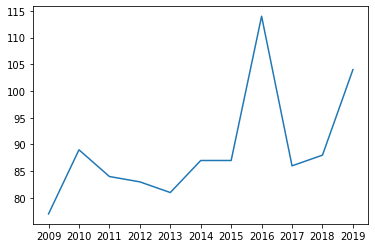

In [148]:
year = ["2009", "2010","2011","2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
homicide_count = [homicide_09, homicide_10, homicide_11, homicide_12, homicide_13, homicide_14, homicide_15,
                  homicide_16, homicide_17, homicide_18, homicide_19]
                  
    
plt.plot(year,homicide_count, label = "homicides")
plt.show()

In [181]:
agg_assualt_09 = cobra_09_new["beat"]["2009"][0]
agg_assualt_09

2613.0

In [182]:
agg_assualt_10 = cobra_09_new["beat"]["2010"][0]
agg_assualt_10

2612.0

In [185]:
agg_assualt_11 = cobra_09_new["beat"]["2011"][0]
agg_assualt_11

2536.0

In [186]:
agg_assualt_12 = cobra_09_new["beat"]["2012"][0]
agg_assualt_12

2521.0

In [187]:
agg_assualt_13 = cobra_09_new["beat"]["2013"][0]
agg_assualt_13

2275.0

In [190]:
agg_assualt_14 = cobra_09_new["beat"]["2014"][0]
agg_assualt_14

2238.0

In [191]:
agg_assualt_15 = cobra_09_new["beat"]["2015"][0]
agg_assualt_15

2156.0

In [192]:
agg_assualt_16 = cobra_09_new["beat"]["2016"][0]
agg_assualt_16

2193.0

In [193]:
agg_assualt_17 = cobra_09_new["beat"]["2017"][0]
agg_assualt_17

2036.0

In [194]:
agg_assualt_18 = cobra_09_new["beat"]["2018"][0]
agg_assualt_18

1825.0

In [195]:
agg_assualt_19 = cobra_09_new["beat"]["2019"][0]
agg_assualt_19

2036.0

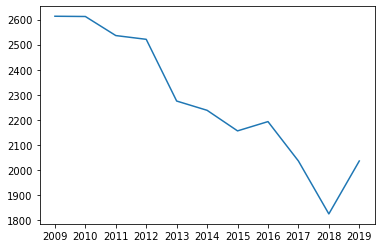

In [196]:
year = ["2009", "2010","2011","2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
agg_assualt_count = [agg_assualt_09, agg_assualt_10, agg_assualt_11, agg_assualt_12, agg_assualt_13, agg_assualt_14, agg_assualt_15,
                 agg_assualt_16, agg_assualt_17, agg_assualt_18, agg_assualt_19]
                  
    
plt.plot(year,agg_assualt_count, label = "aggravated assualts")
plt.show()

In [161]:
cobra_20=pd.pivot_table(cobra_20, columns = "occur_year", index = "UC2_Literal", aggfunc = "count", )
cobra_20=cobra_20.reset_index()
cobra_20

UC2_Literal beat                   ibr_code            \
occur_year                       2012 2016 2019    2020     2012 2016 2019   
0                    AGG ASSAULT  NaN  NaN  NaN   699.0      NaN  NaN  NaN   
1                     AUTO THEFT  NaN  NaN  2.0  1155.0      NaN  NaN  2.0   
2                       BURGLARY  NaN  NaN  1.0   479.0      NaN  NaN  1.0   
3                       HOMICIDE  NaN  NaN  NaN    44.0      NaN  NaN  NaN   
4           LARCENY-FROM VEHICLE  NaN  NaN  NaN  3317.0      NaN  NaN  NaN   
5            LARCENY-NON VEHICLE  1.0  1.0  4.0  1259.0      1.0  1.0  4.0   
6                        ROBBERY  NaN  NaN  NaN   277.0      NaN  NaN  NaN   

                    lat  ... offense_id         poss_time                    \
occur_year    2020 2012  ...       2019    2020      2012 2016 2019    2020   
0            699.0  NaN  ...        NaN   699.0       NaN  NaN  NaN   672.0   
1           1155.0  NaN  ...        2.0  1155.0       NaN  NaN  2.0  1131.0   
2            479.0  NaN  ...        1.0   479.0       NaN  NaN  1.0   470.0   
3             44.0  NaN  ...        NaN    44.0       NaN  NaN  NaN    44.0   
4           3317.0  NaN  ...        NaN  3317.0       NaN  NaN  NaN  3281.0   
5           1259.0  1.0  ...        4.0  1259.0       1.0  1.0  3.0  1214.0   
6            277.0  NaN  ...        NaN   277.0       NaN  NaN  NaN   269.0   

           rpt_date                    
occur_year     2012 2016 2019    2020  
0               NaN  NaN  NaN   699.0  
1               NaN  NaN  2.0  1155.0  
2               NaN  NaN  1.0   479.0  
3               NaN  NaN  NaN    44.0  
4               NaN  NaN  NaN  3317.0  
5               1.0  1.0  4.0  1259.0  
6               NaN  NaN  NaN   277.0  

[7 rows x 49 columns]

In [162]:
list(cobra_20.columns)

[('UC2_Literal', ''),
 ('beat', '2012'),
 ('beat', '2016'),
 ('beat', '2019'),
 ('beat', '2020'),
 ('ibr_code', '2012'),
 ('ibr_code', '2016'),
 ('ibr_code', '2019'),
 ('ibr_code', '2020'),
 ('lat', '2012'),
 ('lat', '2016'),
 ('lat', '2019'),
 ('lat', '2020'),
 ('location', '2012'),
 ('location', '2016'),
 ('location', '2019'),
 ('location', '2020'),
 ('long', '2012'),
 ('long', '2016'),
 ('long', '2019'),
 ('long', '2020'),
 ('neighborhood', '2012'),
 ('neighborhood', '2016'),
 ('neighborhood', '2019'),
 ('neighborhood', '2020'),
 ('npu', '2012'),
 ('npu', '2016'),
 ('npu', '2019'),
 ('npu', '2020'),
 ('occur_date', '2012'),
 ('occur_date', '2016'),
 ('occur_date', '2019'),
 ('occur_date', '2020'),
 ('occur_time', '2012'),
 ('occur_time', '2016'),
 ('occur_time', '2019'),
 ('occur_time', '2020'),
 ('offense_id', '2012'),
 ('offense_id', '2016'),
 ('offense_id', '2019'),
 ('offense_id', '2020'),
 ('poss_time', '2012'),
 ('poss_time', '2016'),
 ('poss_time', '2019'),
 ('poss_time', '20

In [218]:
#homicide_20 = cobra_20["beat"]["2020"][3]
#homicide_20

#larceny_non_vehicle_20 = cobra_20["beat"]["2020"][5]
#larceny_non_vehicle_20

1259.0

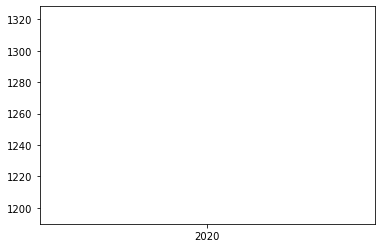

In [219]:
#year_20 = ["2020"]
#larceny_non_vehicle_count_20 = [larceny_non_vehicle_20]
#plt.plot(year_2020,larceny_non_vehicle_count_20, label = "larceny non vehicle")
#plt.show()
                    

In [199]:
cobra_21=pd.pivot_table(cobra_21, columns = "occur_year", index = "UC2_Literal", aggfunc = "count")
cobra_21=cobra_21.reset_index()
cobra_21

UC2_Literal beat                                    \
occur_year                       2001 2010 2015 2018 2019  2020    2021   
0                    AGG ASSAULT  1.0  NaN  NaN  NaN  NaN   6.0  1996.0   
1                     AUTO THEFT  NaN  NaN  NaN  NaN  NaN  38.0  2526.0   
2                       BURGLARY  NaN  NaN  NaN  NaN  1.0  16.0  1222.0   
3                       HOMICIDE  NaN  NaN  NaN  NaN  NaN   NaN   124.0   
4           LARCENY-FROM VEHICLE  NaN  NaN  NaN  1.0  NaN  31.0  6854.0   
5            LARCENY-NON VEHICLE  1.0  1.0  1.0  3.0  2.0  80.0  4063.0   
6                        ROBBERY  NaN  NaN  NaN  NaN  NaN   2.0   651.0   

           ibr_code       ... poss_time               rpt_date                 \
occur_year     2001 2010  ...      2019  2020    2021     2001 2010 2015 2018   
0               1.0  NaN  ...       NaN   6.0  1937.0      1.0  NaN  NaN  NaN   
1               NaN  NaN  ...       NaN  38.0  2476.0      NaN  NaN  NaN  NaN   
2               NaN  NaN  ...       1.0  16.0  1194.0      NaN  NaN  NaN  NaN   
3               NaN  NaN  ...       NaN   NaN   123.0      NaN  NaN  NaN  NaN   
4               NaN  NaN  ...       NaN  31.0  6757.0      NaN  NaN  NaN  1.0   
5               1.0  1.0  ...       2.0  79.0  3973.0      1.0  1.0  1.0  3.0   
6               NaN  NaN  ...       NaN   2.0   640.0      NaN  NaN  NaN  NaN   

                               
occur_year 2019  2020    2021  
0           NaN   6.0  1996.0  
1           NaN  38.0  2526.0  
2           1.0  16.0  1222.0  
3           NaN   NaN   124.0  
4           NaN  31.0  6854.0  
5           2.0  80.0  4063.0  
6           NaN   2.0   651.0  

[7 rows x 85 columns]

In [201]:
list(cobra_21.columns)

[('UC2_Literal', ''),
 ('beat', '2001'),
 ('beat', '2010'),
 ('beat', '2015'),
 ('beat', '2018'),
 ('beat', '2019'),
 ('beat', '2020'),
 ('beat', '2021'),
 ('ibr_code', '2001'),
 ('ibr_code', '2010'),
 ('ibr_code', '2015'),
 ('ibr_code', '2018'),
 ('ibr_code', '2019'),
 ('ibr_code', '2020'),
 ('ibr_code', '2021'),
 ('lat', '2001'),
 ('lat', '2010'),
 ('lat', '2015'),
 ('lat', '2018'),
 ('lat', '2019'),
 ('lat', '2020'),
 ('lat', '2021'),
 ('location', '2001'),
 ('location', '2010'),
 ('location', '2015'),
 ('location', '2018'),
 ('location', '2019'),
 ('location', '2020'),
 ('location', '2021'),
 ('long', '2001'),
 ('long', '2010'),
 ('long', '2015'),
 ('long', '2018'),
 ('long', '2019'),
 ('long', '2020'),
 ('long', '2021'),
 ('neighborhood', '2001'),
 ('neighborhood', '2010'),
 ('neighborhood', '2015'),
 ('neighborhood', '2018'),
 ('neighborhood', '2019'),
 ('neighborhood', '2020'),
 ('neighborhood', '2021'),
 ('npu', '2001'),
 ('npu', '2010'),
 ('npu', '2015'),
 ('npu', '2018'),
 ('

In [214]:
#larceny_non_vehicle_21 = cobra_21["beat"]["2021"][5]
#larceny_non_vehicle_21

4063.0

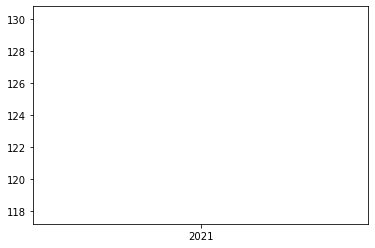

In [217]:
#year_21 = ["2021"]
#larceny_non_vehicle_21_count = [larceny_non_vehicle_21]
#plt.plot(year_21,homicide_count, label = "Larceny Non Vehicle")
#plt.show()

In [210]:
#homicide_2021 = cobra_21["beat"]["2001"][3]
#homicide_2021

nan

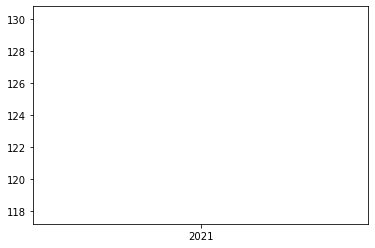

In [203]:
#year_21 = ["2021"]
#homicide_count = [homicide_21]
#plt.plot(year_21,homicide_count, label = "homicide")
#plt.show()